In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Uncertainty_Analysis as ua

In [8]:
np.random.seed(42)
n_samples= 1000
# Alternatives
alt = ['Concrete', 'Concrete Block', 'Wooden-Framed']
lca_results = {
    'Concrete': np.random.normal(100, 10, n_samples),
    'Concrete Block': np.random.normal(90, 15, n_samples),
    'Wooden-Framed': np.random.normal(80, 20, n_samples)  
}

df = pd.DataFrame(lca_results)

In [9]:
df.size

3000

In [10]:
#Discernability Analysis 
def DA1(df,a1,a2):
    return np.mean(df[a1]-df[a2]<0)


In [11]:
da_results={}

for i in range(len(alt)):
    for j in range(i+1, len(alt)):
        alt1, alt2= alt[i], alt[j]
        prob = DA1(df, alt1,alt2)
        da_results[f"{alt1} vs {alt2}"]=prob

print("Discernibility Analysis (DA) Results:")
for comparison, prob in da_results.items():
    print(f"{comparison}: {prob:.2%}")

Discernibility Analysis (DA) Results:
Concrete vs Concrete Block: 31.90%
Concrete vs Wooden-Framed: 18.30%
Concrete Block vs Wooden-Framed: 32.50%


In [12]:
da_matrix = np.zeros((len(alt),len(alt)))


for i in range(len(alt)):
   for j in range(len(alt)):
      if i != j:
          da_matrix[i,j]= DA(df , alt[i],alt[j])
da_matrix

NameError: name 'DA' is not defined

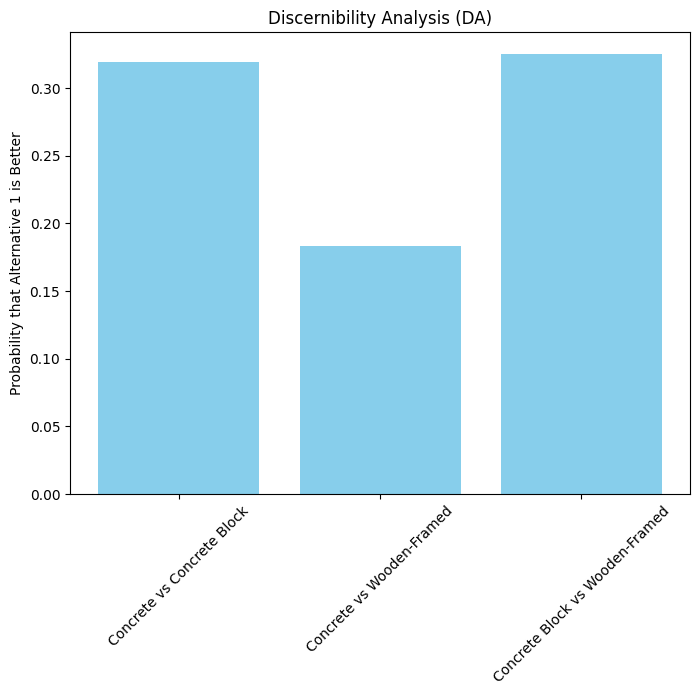

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(da_results.keys(), da_results.values(), color='skyblue')
plt.title("Discernibility Analysis (DA)")
plt.ylabel("Probability that Alternative 1 is Better")
plt.xticks(rotation=45)
plt.show()

In [ ]:
k = np.array([[1,1,1],[1,5,3],[7,1,5]])
a = np.array([[1,1,1],[1,5,3],[7,1,5]])
a-k

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
import pandas as pd
import numpy as np

# Creating a MultiIndex for columns
arrays = [
    ["Alternative 1", "Alternative 1", "Alternative 2",
        "Alternative 2"],  # Main columns
    ["Factor A", "Factor B", "Factor A", "Factor B"]  # Subcolumns
]
multi_index = pd.MultiIndex.from_tuples(list(zip(*arrays)))

# Creating the DataFrame
df1 = pd.DataFrame(np.random.rand(5, 4), columns=multi_index)

print(df1)
# Output: Index(['Factor A', 'Factor B'], dtype='object')



  Alternative 1           Alternative 2          
       Factor A  Factor B      Factor A  Factor B
0      0.818740  0.983567      0.259671  0.969724
1      0.431234  0.347519      0.050350  0.052765
2      0.692011  0.457929      0.226522  0.613970
3      0.252858  0.577632      0.359209  0.823552
4      0.820696  0.477350      0.350819  0.362560


In [ ]:
import pandas as pd
import numpy as np

# Define MultiIndex for rows
row_index = pd.MultiIndex.from_tuples([
    ("Group A", "Item 1"),
    ("Group A", "Item 2"),
    ("Group B", "Item 3"),
    ("Group B", "Item 4"),
], names=["Category", "Item"])

# Define MultiIndex for columns
column_index = pd.MultiIndex.from_tuples([
    ("Alternative 1", "Factor A"),
    ("Alternative 1", "Factor B"),
    ("Alternative 2", "Factor A"),
    ("Alternative 2", "Factor B")
], names=["Alternative", "Factor"])

# Create DataFrame with random values
df_cool_data = pd.DataFrame(np.random.rand(
    4, 4), index=row_index, columns=column_index)

# Print DataFrame
print(df_cool_data)

Alternative     Alternative 1           Alternative 2          
Factor               Factor A  Factor B      Factor A  Factor B
Category Item                                                  
Group A  Item 1      0.805715  0.328179      0.209059  0.084688
         Item 2      0.466693  0.482132      0.840909  0.221239
Group B  Item 3      0.380991  0.808406      0.823624  0.384611
         Item 4      0.459124  0.303286      0.932555  0.118644


In [ ]:
first = ua.UA(df_cool_data)

first.get_alternative_matrix("Alternative 1")

array([[0.80571453, 0.32817948],
       [0.46669312, 0.4821321 ],
       [0.38099127, 0.80840574],
       [0.45912402, 0.30328589]])

In [ ]:
first.get_all_matrices()

{'Alternative 1': array([[0.80571453, 0.32817948],
        [0.46669312, 0.4821321 ],
        [0.38099127, 0.80840574],
        [0.45912402, 0.30328589]]),
 'Alternative 2': array([[0.20905937, 0.08468834],
        [0.84090871, 0.2212387 ],
        [0.82362361, 0.38461108],
        [0.93255488, 0.11864377]])}

In [ ]:
import numpy as np
import pandas as pd

# Create a sample DataFrame
np.random.seed(42)  # For reproducibility

# Define the number of alternatives and parameters
num_alternatives = 3
num_factors = 4
num_samples = 10

# Generate random data for each alternative
data = {}
for alt in range(num_alternatives):
    alternative_name = f"Alternative_{alt+1}"
    data[alternative_name] = np.random.rand(num_samples, num_factors)

# Convert the data into a multi-level DataFrame
columns = pd.MultiIndex.from_tuples(
    [(f"Alternative_{alt+1}", f"Factor_{param+1}")
     for alt in range(num_alternatives) for param in range(num_factors)]
)
df = pd.DataFrame(np.hstack(list(data.values())), columns=columns)

print("Sample DataFrame:")
print(df)

Sample DataFrame:
  Alternative_1                               Alternative_2            \
       Factor_1  Factor_2  Factor_3  Factor_4      Factor_1  Factor_2   
0      0.374540  0.950714  0.731994  0.598658      0.122038  0.495177   
1      0.156019  0.155995  0.058084  0.866176      0.258780  0.662522   
2      0.601115  0.708073  0.020584  0.969910      0.546710  0.184854   
3      0.832443  0.212339  0.181825  0.183405      0.939499  0.894827   
4      0.304242  0.524756  0.431945  0.291229      0.088493  0.195983   
5      0.611853  0.139494  0.292145  0.366362      0.388677  0.271349   
6      0.456070  0.785176  0.199674  0.514234      0.280935  0.542696   
7      0.592415  0.046450  0.607545  0.170524      0.074551  0.986887   
8      0.065052  0.948886  0.965632  0.808397      0.005522  0.815461   
9      0.304614  0.097672  0.684233  0.440152      0.771270  0.074045   

                      Alternative_3                                
   Factor_3  Factor_4      Factor_1  

In [ ]:
import Uncertainty_Analysis as un_an


# Initialize the UA class with the DataFrame
uncertainty_analysis = un_an.UA(df)


uncertainty_analysis.pairwise_matrix_differences()

{('Concrete',
  'Concrete Block'): array([-6.02319002e+00, -5.25214826e+00,  1.55824298e+01,  3.49343502e+01,
        -2.81488345e+00,  1.75634965e+00,  1.23642299e+01,  8.14677027e+00,
        -1.04380346e+01,  2.34541286e+01, -1.43950879e+01,  2.37870839e+00,
        -1.87092904e+01,  1.20501482e+00, -3.32886354e+01,  1.40846296e+00,
         9.64295885e+00,  2.04007608e+01,  5.72496887e+00, -1.04855262e+01,
         1.68139554e+01,  1.63477371e+01,  1.10406009e+01, -3.63815372e+01,
        -2.13569748e+01,  4.56437085e+00, -2.07998795e+00,  1.19565103e+01,
        -5.20915649e+00,  2.24249510e+01,  7.84358194e+00,  5.35515430e+01,
         3.87668091e+00, -1.02850484e+01,  2.54732461e+01, -2.58182379e+01,
         3.04751209e+01,  1.23689220e+01, -6.64863777e+00, -3.73786218e+00,
        -7.87424957e+00,  1.85969468e+01, -7.33669533e+00,  7.56659009e+00,
        -2.19581040e+00, -1.04533411e+01, -4.39123089e+00,  4.42171046e+01,
        -8.71192235e+00, -2.83317719e+01,  2.26242802e